In [5]:
from pyod.models.copod import COPOD
import pandas as pd
from sklearn.model_selection import train_test_split

file = "../results/processed_data/opcua_undersampled.csv"
data = pd.read_csv(file)

# eliminar las columnas que no son numéricas
# data = data.select_dtypes(include=["float64", "int64", "int32"])

# quitar las ultimas 2 columnas
# data = data.iloc[:, :-1]
data

,src_port,dst_port,pktTotalCount,octetTotalCount,avg_ps,service_errors,status_errors,msg_size,min_msg_size,count,srv_count,same_srv_rate,dst_host_same_src_port_rate,f_pktTotalCount,f_octetTotalCount,f_rate,b_pktTotalCount,b_octetTotalCount,label
0,1.206194,-0.003048,1.477705,1.479068,1.476717,0,0,1.476746,1.482711,-1.243593,-1.243602,0.028222,0.028427,-0.003048,1.457174,1.480937,1.485845,1.483265,0
1,0.566946,-0.003048,1.477705,1.479068,1.476717,0,0,1.476746,1.482711,-1.210500,-1.210510,0.028222,0.028427,-0.003048,1.457174,1.480937,1.485845,1.483265,0
2,0.566946,-0.003048,1.477705,1.479068,1.476717,0,0,1.476746,1.482711,-1.210500,-1.210510,0.028222,0.028427,-0.003048,1.457174,1.480937,1.485845,1.483265,0
3,0.513411,-0.003048,1.477705,1.479068,1.476717,0,0,1.476746,1.482711,-1.210500,-1.210510,0.028222,0.028427,-0.003048,1.457174,1.480937,1.485845,1.483265,0
4,1.268722,-0.003048,1.477705,1.479068,1.476717,0,0,1.476746,1.482711,-1.210500,-1.210510,0.028222,0.028427,-0.003048,1.457174,1.480937,1.485845,1.483265,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67127,-1.376190,-0.003048,-0.669760,-0.670657,-0.670858,0,0,-0.669710,-0.670404,0.841241,0.841207,0.028222,0.028427,-0.003048,-0.663343,-0.673385,-0.673012,-0.670741,1
67128,-0.845652,-0.003048,-0.669760,-0.670657,-0.670858,0,0,-0.669710,-0.670404,0.760348,0.760315,0.028222,0.028427,-0.003048,-0.663343,-0.673385,-0.673012,-0.670741,1
67129,-1.283879,-0.003048,-0.669760,-0.670657,-0.670858,0,0,-0.669710,-0.670404,0.822856,0.822823,0.028222,0.028427,-0.003048,-0.663343,-0.673385,-0.673012,-0.670741,1
67130,-0.659549,-0.003048,-0.669760,-0.670657,-0.670858,0,0,-0.669710,-0.670404,0.738286,0.738254,0.028222,0.028427,-0.003048,-0.663343,-0.673385,-0.673012,-0.670741,1


In [6]:
data.describe()

,src_port,dst_port,pktTotalCount,octetTotalCount,avg_ps,service_errors,status_errors,msg_size,min_msg_size,count,srv_count,same_srv_rate,dst_host_same_src_port_rate,f_pktTotalCount,f_octetTotalCount,f_rate,b_pktTotalCount,b_octetTotalCount,label
count,67132.000000,67132.000000,67132.000000,67132.000000,67132.000000,67132.0,67132.0,67132.000000,67132.000000,67132.000000,67132.000000,67132.000000,67132.000000,67132.000000,67132.000000,67132.000000,67132.000000,67132.000000,67132.000000
mean,0.169321,0.001839,0.404069,0.404124,0.403315,0.0,0.0,0.403366,0.402401,-0.333420,-0.333402,-0.017027,-0.017150,0.001839,0.399019,0.405059,0.406031,0.404661,0.500000
std,0.923799,1.266216,1.081391,1.081091,1.080055,0.0,0.0,1.081616,1.078630,1.019779,1.019798,1.265916,1.265911,1.266216,1.084927,1.078916,1.079436,1.080802,0.500004
min,-1.833936,-0.003048,-0.669760,-0.670657,-0.670858,0.0,0.0,-0.669710,-0.804974,-1.302424,-1.302433,-35.533957,-35.306805,-0.003048,-0.663343,-0.673385,-0.673012,-0.670741,0.000000
25%,-0.317614,-0.003048,-0.669760,-0.670657,-0.670858,0.0,0.0,-0.669710,-0.670404,-1.239916,-1.239925,0.028222,0.028427,-0.003048,-0.663343,-0.673385,-0.673012,-0.670741,0.000000
50%,0.325191,-0.003048,-0.669760,0.376645,0.868046,0.0,0.0,0.486074,0.877148,-1.210500,-1.210510,0.028222,0.028427,-0.003048,0.788543,0.801646,-0.673012,-0.670741,0.500000
75%,0.790410,-0.003048,1.477705,1.479068,1.476717,0.0,0.0,1.476746,1.482711,0.797117,0.797084,0.028222,0.028427,-0.003048,1.457174,1.480937,1.485845,1.483265,1.000000
max,1.632676,328.071639,33.689684,24.748062,8.619989,0.0,0.0,23.106420,7.403779,3.168753,3.168693,0.028222,0.028427,328.071639,57.908778,4.217508,1.485845,7.878800,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67132 entries, 0 to 67131
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   src_port                     67132 non-null  float64
 1   dst_port                     67132 non-null  float64
 2   pktTotalCount                67132 non-null  float64
 3   octetTotalCount              67132 non-null  float64
 4   avg_ps                       67132 non-null  float64
 5   service_errors               67132 non-null  int64  
 6   status_errors                67132 non-null  int64  
 7   msg_size                     67132 non-null  float64
 8   min_msg_size                 67132 non-null  float64
 9   count                        67132 non-null  float64
 10  srv_count                    67132 non-null  float64
 11  same_srv_rate                67132 non-null  float64
 12  dst_host_same_src_port_rate  67132 non-null  float64
 13  f_pktTotalCount 

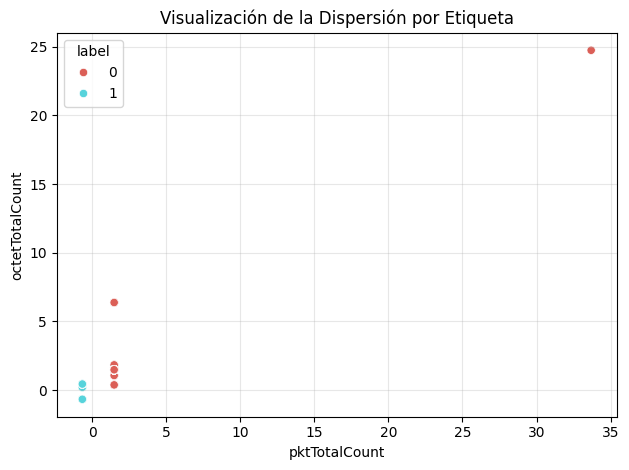

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que 'data' es tu DataFrame con las características y etiquetas
# Ejemplo de cómo debería estar estructurado:
# data = pd.DataFrame({
#     'feature1': [...],  # Valores numéricos
#     'feature2': [...],  # Valores numéricos
#     'label': [...]      # Etiquetas categóricas
# })

# Gráfico de dispersión mejorado
sns.scatterplot(
    x=data.columns[2],  # Primera característica
    y=data.columns[3],  # Segunda característica
    hue="label",  # Variable de coloración
    data=data,
    palette="hls",
    legend="full",
)
plt.title("Visualización de la Dispersión por Etiqueta")
plt.xlabel(data.columns[2])  # Nombre de la primera característica
plt.ylabel(data.columns[3])  # Nombre de la segunda característica
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [9]:
# dividir el dataset en train y test
# columna label es Y
# y las demas son X
import numpy as np

X = data.drop(columns=["label"])
y = data["label"]

# Primera división: 80% train, 20% temp (val + test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X,
    y,
    test_size=0.2,  # 20% para val + test
    random_state=42,  # semilla para reproducibilidad
    stratify=y,  # mantiene proporción de clases (opcional)
)

# Segunda división: 50% val, 50% test del temp (10% c/u del total)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp,
    y_temp,
    test_size=0.5,  # divide el 20% en mitades
    random_state=42,
    stratify=y_temp,  # mantiene proporción en val/test
)

# Verificación de tamaños
total_samples = len(X)
print(f"Total samples: {total_samples}")
print(f"Train: {len(X_train)} samples ({len(X_train)/total_samples:.1%})")
print(f"Validation: {len(X_val)} samples ({len(X_val)/total_samples:.1%})")
print(f"Test: {len(X_test)} samples ({len(X_test)/total_samples:.1%})")

# Verificación de distribución de clases (si es clasificación)
if len(np.unique(y)) > 1:
    print("\nDistribución de clases:")
    for name, set_ in [("Train", y_train), ("Validation", y_val), ("Test", y_test)]:
        unique, counts = np.unique(set_, return_counts=True)
        print(f"{name}: {dict(zip(unique, counts))}")

Total samples: 67132
Train: 53705 samples (80.0%)
Validation: 6713 samples (10.0%)
Test: 6714 samples (10.0%)

Distribución de clases:
Train: {np.int64(0): np.int64(26852), np.int64(1): np.int64(26853)}
Validation: {np.int64(0): np.int64(3357), np.int64(1): np.int64(3356)}
Test: {np.int64(0): np.int64(3357), np.int64(1): np.int64(3357)}


In [10]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (53705, 18)
X_test shape: (6714, 18)


In [11]:
clf_name = "COPOD"
clf = COPOD()
clf.fit(X_train)

COPOD(contamination=0.1, n_jobs=1)

## Entrenamiento aplicando SUOD para automatizar entrenamientos de varios modelos

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyod.models.suod import SUOD
from pyod.models.copod import COPOD
from pyod.models.lof import LOF
from pyod.models.cblof import CBLOF
from pyod.models.iforest import IForest
from sklearn.metrics import roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.preprocessing import StandardScaler

# 1. Carga y preparación de datos (asumiendo que ya tienes X_train, X_test, y_train, y_test)
# Asegúrate de que tus datos estén en formato numpy array
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Normalización de datos (recomendado para la mayoría de modelos)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Configuración de los modelos base
detector_list = [
    # COPOD - Basado en cópulas estadísticas
    COPOD(contamination=0.1),  
    
    # Variantes de LOF - Basado en densidad local
    LOF(n_neighbors=20, contamination=0.1),
    LOF(n_neighbors=50, metric='cosine', contamination=0.1),
    
    # CBLOF - Basado en clustering
    CBLOF(n_clusters=8, alpha=0.9, contamination=0.1),
    
    # Isolation Forest - Basado en árboles
    IForest(n_estimators=200, contamination=0.1, behaviour='new'),
    IForest(n_estimators=100, max_features=0.7, contamination=0.1)
]

# 3. Configuración e implementación de SUOD
suod_clf = SUOD(
    base_estimators=detector_list,
    n_jobs=4,                      # Ajusta según tus núcleos de CPU
    combination='average',         # Estrategia de combinación
    verbose=True,
    contamination=0.1,            # Ajusta según tu tasa esperada de anomalías
    rp_flag_global=True,          # Reducción de dimensionalidad
    bps_flag=True                 # Balance entre paralelización y velocidad
)

# 4. Entrenamiento del modelo
print("Entrenando el ensemble SUOD...")
suod_clf.fit(X_train_scaled)

# 5. Predicción en conjunto de test
print("\nEvaluando en el conjunto de test...")
test_scores = suod_clf.decision_function(X_test_scaled)
test_pred = suod_clf.predict(X_test_scaled)

Entrenando el ensemble SUOD...
RandomForestRegressor()
Worker 1 sum of ranks: 3.75
Worker 2 sum of ranks: 2.916666666666667
Worker 3 sum of ranks: 2.8333333333333335
Worker 4 sum of ranks: 0.0

Split among workers BPS: [0, 2, 4, 6, 6] [2, 2, 2, 0]
Parallel Training...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
Traceback (most recent call last):
  File "/home/mai_lavender/Escritorio/COMPUTER SCIENCE/2025-pao-i/metodología/OPC-UA-PyOD/.venv/lib/python3.11/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 266, in main
    registry[rtype][name] -= 1
    ~~~~~~~~~~~~~~~^^^^^^
KeyError: '/dev/shm/joblib_memmapping_folder_100501_aa2f5b5890194ffb8a218b9c3558c3d0_d5fffcde292440a9ae3921b732bee20f/100501-140625271040528-5d8a47061a134acfb0d9438634e7bb1f.pkl'
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    7.6s remaining:    7.6s
Traceback (most recent call last):
  File "/home/mai_lavender/Escritorio/COMPUTER SCIENCE/2025-pao-i/metodología/OPC-UA-PyOD/.venv/lib/python3.11/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 266, in main
    registry[rtype][name] -= 1
    ~~~~~~~~~~~~~~~^^^^^^
KeyError: '/dev/shm/joblib_memmapping_folder_100501_aa2f5b5890194ffb8a218b9c3558c3d0_d5fffcd

Balanced Scheduling Total Train Time: 70.48862314224243
Split among workers default: [2 4 5 6] [np.int64(2), np.int64(1), np.int64(1)]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
Traceback (most recent call last):
  File "/home/mai_lavender/Escritorio/COMPUTER SCIENCE/2025-pao-i/metodología/OPC-UA-PyOD/.venv/lib/python3.11/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 266, in main
    registry[rtype][name] -= 1
    ~~~~~~~~~~~~~~~^^^^^^
KeyError: '/dev/shm/joblib_memmapping_folder_100501_aa2f5b5890194ffb8a218b9c3558c3d0_f2344a2ad48540c08e489f1338dd11fa/100501-140625271040528-5d8a47061a134acfb0d9438634e7bb1f.pkl'
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    0.2s remaining:    0.2s
Traceback (most recent call last):
  File "/home/mai_lavender/Escritorio/COMPUTER SCIENCE/2025-pao-i/metodología/OPC-UA-PyOD/.venv/lib/python3.11/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 266, in main
    registry[rtype][name] -= 1
    ~~~~~~~~~~~~~~~^^^^^^
KeyError: '/dev/shm/joblib_memmapping_folder_100501_aa2f5b5890194ffb8a218b9c3558c3d0_f2344a2


Evaluando en el conjunto de test...
Worker 1 sum of ranks: 3.75
Worker 2 sum of ranks: 2.916666666666667
Worker 3 sum of ranks: 2.8333333333333335
Worker 4 sum of ranks: 0.0

Split among workers BPS: [0, 2, 4, 6, 6] [2, 2, 2, 0]
Parallel score prediction...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
Traceback (most recent call last):
  File "/home/mai_lavender/Escritorio/COMPUTER SCIENCE/2025-pao-i/metodología/OPC-UA-PyOD/.venv/lib/python3.11/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 266, in main
    registry[rtype][name] -= 1
    ~~~~~~~~~~~~~~~^^^^^^
KeyError: '/dev/shm/joblib_memmapping_folder_100501_aa2f5b5890194ffb8a218b9c3558c3d0_0f5f841a19ed4d28990fe165c943aff8/100501-140625271040528-4e980b406f5e413fb4046f29587489b4.pkl'
Traceback (most recent call last):
  File "/home/mai_lavender/Escritorio/COMPUTER SCIENCE/2025-pao-i/metodología/OPC-UA-PyOD/.venv/lib/python3.11/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 266, in main
    registry[rtype][name] -= 1
    ~~~~~~~~~~~~~~~^^^^^^
KeyError: '/dev/shm/joblib_memmapping_folder_100501_aa2f5b5890194ffb8a218b9c3558c3d0_0f5f841a19ed4d28990fe165c943aff8/100501-140625271040528-faf8f8c7a74940069824e3a082b7f71

Parallel Score Prediction without Approximators Total Time: 2.743048667907715
Worker 1 sum of ranks: 3.75
Worker 2 sum of ranks: 2.916666666666667
Worker 3 sum of ranks: 2.8333333333333335
Worker 4 sum of ranks: 0.0

Split among workers BPS: [0, 2, 4, 6, 6] [2, 2, 2, 0]
Parallel score prediction...


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
Traceback (most recent call last):
  File "/home/mai_lavender/Escritorio/COMPUTER SCIENCE/2025-pao-i/metodología/OPC-UA-PyOD/.venv/lib/python3.11/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 266, in main
    registry[rtype][name] -= 1
    ~~~~~~~~~~~~~~~^^^^^^
KeyError: '/dev/shm/joblib_memmapping_folder_100501_aa2f5b5890194ffb8a218b9c3558c3d0_cf150adcfa6647a09084f3a7aa5aaba2/100501-140625271040528-d35c1d4f639947658027d1b2e573fd55.pkl'
Traceback (most recent call last):
  File "/home/mai_lavender/Escritorio/COMPUTER SCIENCE/2025-pao-i/metodología/OPC-UA-PyOD/.venv/lib/python3.11/site-packages/joblib/externals/loky/backend/resource_tracker.py", line 266, in main
    registry[rtype][name] -= 1
    ~~~~~~~~~~~~~~~^^^^^^
KeyError: '/dev/shm/joblib_memmapping_folder_100501_aa2f5b5890194ffb8a218b9c3558c3d0_cf150adcfa6647a09084f3a7aa5aaba2/100501-140625271040528-120c594071e14a0c9dd9133170160ef

Parallel Score Prediction without Approximators Total Time: 2.2752676010131836



Métricas de evaluación:
ROC AUC: 0.3617
Average Precision: 0.4487


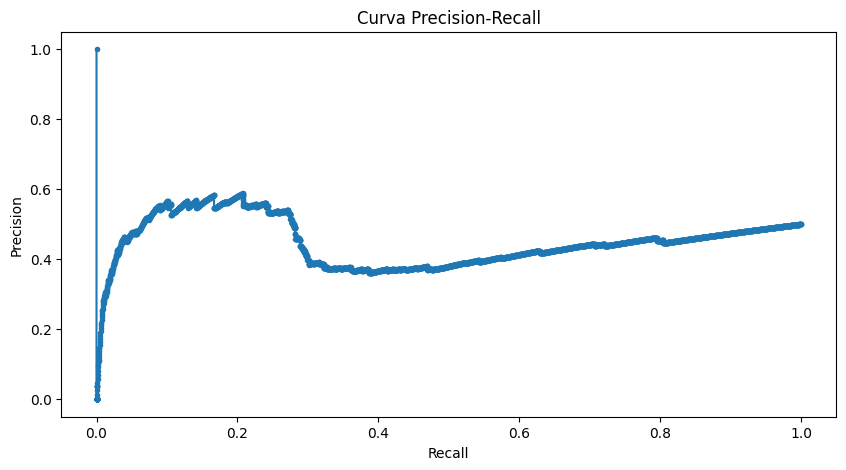


Visualización de anomalías detectadas:
Varianza explicada por componentes PCA: [0.53270867 0.35425704]


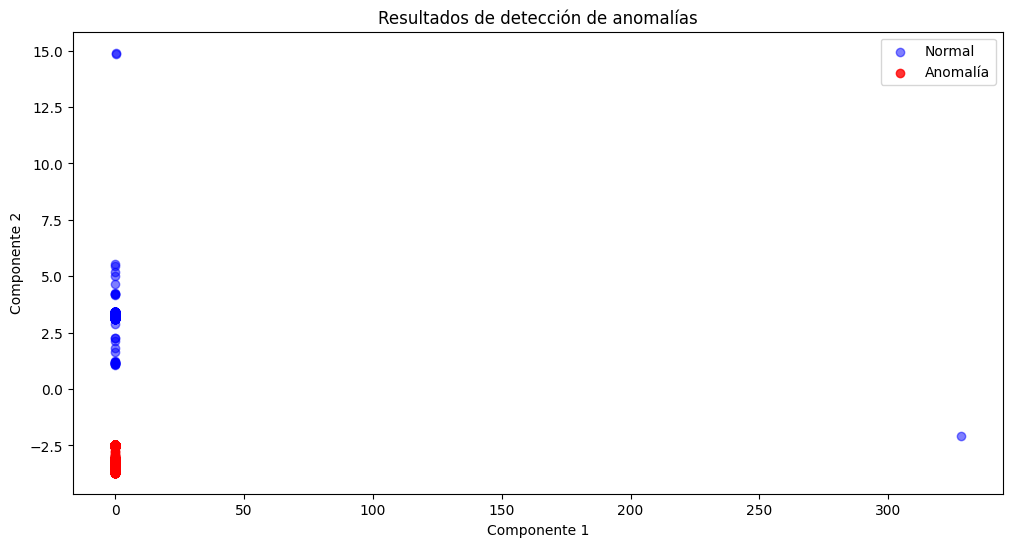


Evaluación de modelos individuales:


AttributeError: 'SUOD' object has no attribute 'base_estimator_names'

In [13]:
# 6. Evaluación del modelo
def evaluate_model(y_true, scores):
    auc = roc_auc_score(y_true, scores)
    ap = average_precision_score(y_true, scores)
    print(f"\nMétricas de evaluación:")
    print(f"ROC AUC: {auc:.4f}")
    print(f"Average Precision: {ap:.4f}")
    
    # Cálculo de precisión y recall para diferentes umbrales
    precision, recall, thresholds = precision_recall_curve(y_true, scores)
    
    # Gráfico Precision-Recall
    plt.figure(figsize=(10, 5))
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Curva Precision-Recall')
    plt.show()
    
    return auc, ap

# Evaluación en test
auc, ap = evaluate_model(y_test, test_scores)

# 7. Visualización de resultados (asumiendo 2D o usando PCA para reducción)
def plot_results(X, scores, y_true=None):
    # Reducción a 2D si los datos tienen más dimensiones
    if X.shape[1] > 2:
        from sklearn.decomposition import PCA
        pca = PCA(n_components=2)
        X_plot = pca.fit_transform(X)
        print(f"Varianza explicada por componentes PCA: {pca.explained_variance_ratio_}")
    else:
        X_plot = X
    
    plt.figure(figsize=(12, 6))
    
    if y_true is not None:
        # Graficar con etiquetas verdaderas
        normal = X_plot[y_true == 0]
        anomalies = X_plot[y_true == 1]
        plt.scatter(normal[:, 0], normal[:, 1], c='blue', alpha=0.5, label='Normal')
        plt.scatter(anomalies[:, 0], anomalies[:, 1], c='red', alpha=0.8, label='Anomalía')
        plt.legend()
    else:
        # Graficar solo con scores de anomalía
        scatter = plt.scatter(X_plot[:, 0], X_plot[:, 1], c=scores, 
                            cmap='coolwarm', alpha=0.6)
        plt.colorbar(scatter, label='Score de anomalía')
    
    plt.title('Resultados de detección de anomalías')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.show()

# Visualizar resultados en test
print("\nVisualización de anomalías detectadas:")
plot_results(X_test_scaled, test_scores, y_test)

# 8. Opcional: Análisis de modelos individuales
print("\nEvaluación de modelos individuales:")
for name, scores in zip(suod_clf.base_estimator_names, suod_clf.base_estimator_scores):
    auc = roc_auc_score(y_test, scores)
    print(f"{name}: ROC AUC = {auc:.4f}")

# 9. Guardar modelo entrenado (opcional)
from joblib import dump
dump(suod_clf, 'suod_model.joblib')
print("\nModelo guardado como 'suod_model.joblib'")